In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c8661752c5f76ee8ba7196cbbe579eea721b2114e6645d9d7d6674f9dd64ab8c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
rice = ctrl.Antecedent(np.arange(0,11,1),'rice')
time = ctrl.Antecedent(np.arange(10,310,10),'time')
power = ctrl.Consequent(np.arange(10,101,1),'power')

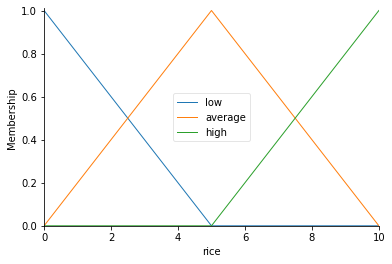

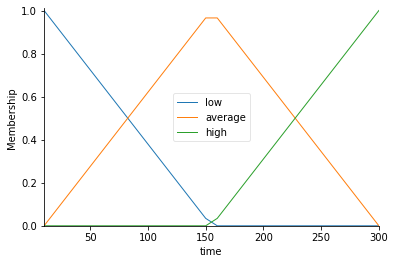

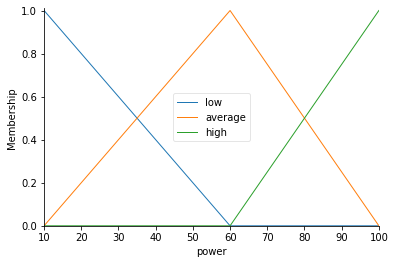

In [ ]:
rice['low'] = fuzz.trimf(rice.universe,[0,0,5])
rice['average'] = fuzz.trimf(rice.universe,[0,5,10])
rice['high'] = fuzz.trimf(rice.universe,[5,10,10])
rice.view()
time['low'] = fuzz.trimf(time.universe,[10,10,155])
time['average'] = fuzz.trimf(time.universe,[10,155,300])
time['high'] = fuzz.trimf(time.universe,[155,300,300])
time.view()
power['low'] = fuzz.trimf(power.universe,[10,10,60])
power['average'] = fuzz.trimf(power.universe,[10,60,100])
power['high'] = fuzz.trimf(power.universe,[60,100,100])
power.view()

In [ ]:
rule1 = ctrl.Rule(rice['low'] & time['low'], power['average'])
rule2 = ctrl.Rule(rice['low'] & time['average'], power['low'])
rule3 = ctrl.Rule(rice['low'] & time['high'], power['low'])
rule4 = ctrl.Rule(rice['average'] & time['low'], power['high'])
rule5 = ctrl.Rule(rice['average'] & time['average'], power['average'])
rule6 = ctrl.Rule(rice['average'] & time['high'], power['average'])
rule7 = ctrl.Rule(rice['high'] & time['average'], power['high'])
rule8 = ctrl.Rule(rice['high'] & time['low'], power['high'])
rule9 = ctrl.Rule(rice['high'] & time['high'], power['average'])

39.50724637681161


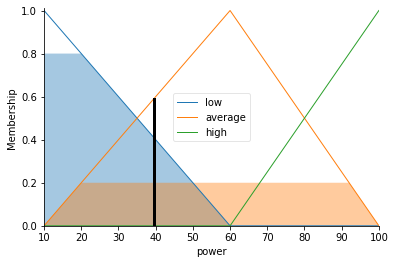

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2,rule3, rule4, rule5,rule6, rule7, rule8,rule9, rule2])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['rice'] = 1
tipping.input['time'] = 300
tipping.compute()
print(tipping.output['power'])
power.view(sim = tipping)